# RNN Based Models

## Simple RNN Model

In [62]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [63]:
text = '''sam is red
hannah not red
hannah is green
bob is green
bob not red
sam not green
sarah is red
sarah not green
'''
sentences = text.rstrip().split('\n')

In [64]:
lemma = lambda x: x.strip().lower().split(' ')
sentences_lemmatized  = [lemma(sentence) for sentence in sentences]

In [65]:
words = set(itertools.chain(*sentences_lemmatized))

In [66]:
word_to_int = dict((w,i) for i,w in enumerate(words))
int_to_word = list(words)
print int_to_word
print word_to_int

['sarah', 'sam', 'hannah', 'is', 'green', 'not', 'bob', 'red']
{'sarah': 0, 'sam': 1, 'hannah': 2, 'is': 3, 'green': 4, 'not': 5, 'bob': 6, 'red': 7}


In [67]:
sentences_indexed = [[word_to_int[word] for word in sentence] for sentence in sentences_lemmatized]
sentences_array = np.asarray(sentences_indexed,dtype = 'int32')

In [68]:
is_green = np.asarray([[0, 1, 1, 1, 1, 0, 0, 0]], dtype='int32').T

In [69]:
sentence_maxlen = 3
n_words = len(words)
n_embed_dims = 3

In [78]:
from keras.models import Model
from keras.layers import Input,Embedding,Dropout,SimpleRNN,Dense,Activation

In [71]:
#model = Sequential()
#model.add(Embedding(n_words,n_embed_dims,input_length = sentence_maxlen))
#model.add(SimpleRNN(n_embed_dims,return_sequences = True,input_shape = (sentence_maxlen,n_embed_dims)))
#model.add(Dropout(0.25))
#model.add(SimpleRNN(32,return_sequences = False))
#model.add(Dropout(0.25))
#model.add(Dense(1))
#model.add(Activation('softmax'))

In [84]:
input_sentence = Input(shape=(sentence_maxlen,), dtype='int32')
input_embedding = Embedding(n_words,n_embed_dims)(input_sentence)
color_prediction = SimpleRNN(1)(input_embedding)
predict_green = Model(input=[input_sentence], output=[color_prediction])

In [85]:
predict_green.compile(loss = 'binary_crossentropy',optimizer = 'adagrad',metrics = ['accuracy'])

In [86]:
hist = predict_green.fit([sentences_array],[is_green],nb_epoch = 1000,batch_size=32,verbose = 0)

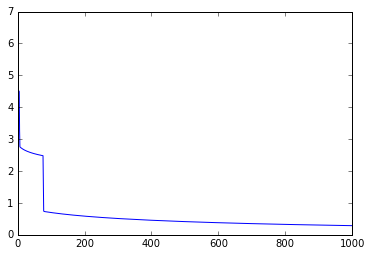

In [87]:
info = hist.history
plt.plot(info['loss'])